Original train  8000


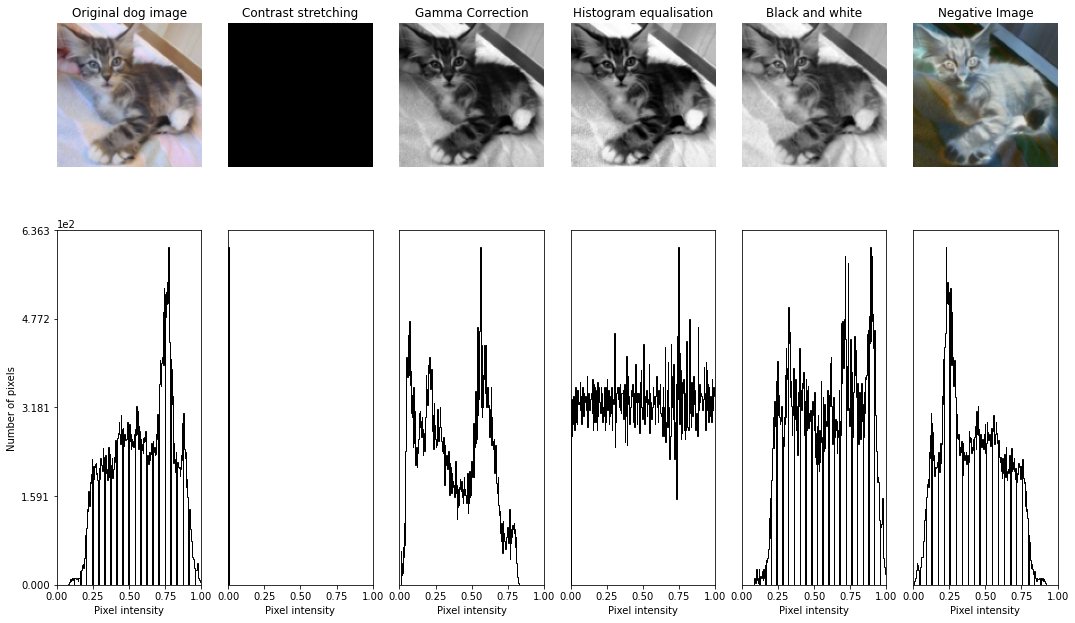

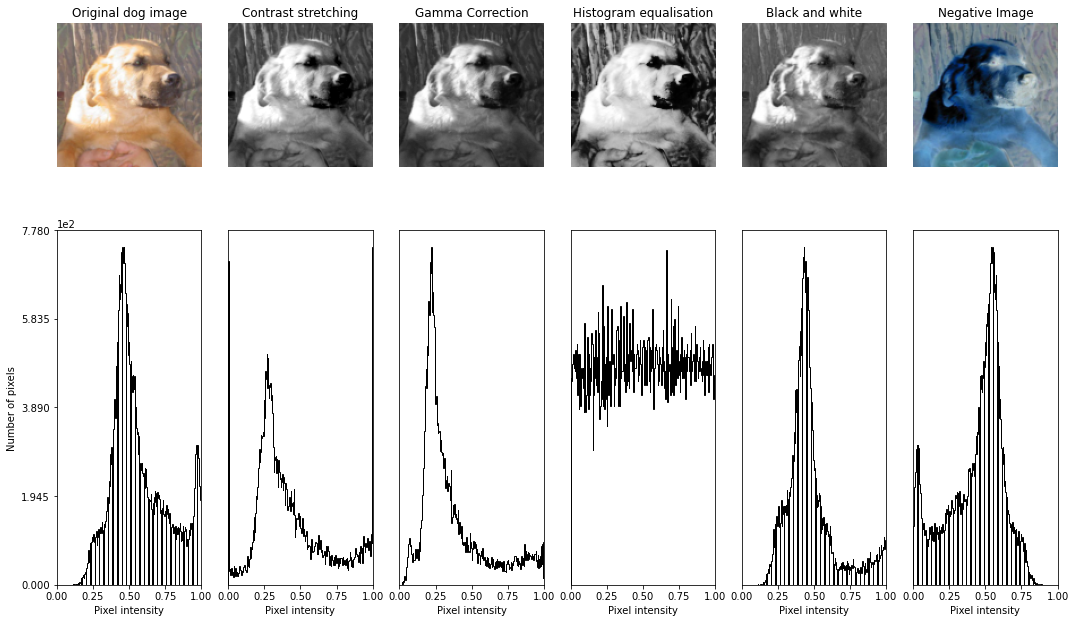

In [45]:
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToPILImage, Compose, ToTensor, Resize, Normalize, RandomHorizontalFlip, \
    RandomVerticalFlip, CenterCrop, ColorJitter
from scipy.ndimage import convolve 
from skimage import exposure
from skimage.color import rgb2gray


"""
get_loaders function is used to load the data from different folders
"""

# sample is % of data to use
def get_loaders(sample=1, normalize=True):    
    DIR = "./dataset"
    DIR_TRAIN = DIR + "/training_set"
    DIR_TEST = DIR + "/test_set"
    
    train_folder = ImageFolder(DIR_TRAIN)
    print("Original train ", len(train_folder))
    
    trans = [Resize((128, 128)), ToTensor()]
    if normalize:
        trans.append(Normalize(0.5, 0.5, 0.5))
    train_folder = ImageFolder(DIR_TRAIN, transform=Compose(trans))
    
    sample_ids = list(range(0, len(train_folder), int(1.0 / sample)))
    sampled_train = Subset(train_folder, sample_ids)

    test_folder = ImageFolder(DIR_TEST, transform=Compose(trans))
    test_loader = DataLoader(test_folder, batch_size=128)

    train_idx, valid_idx = train_test_split(list(range(len(sampled_train))), test_size=0.2)

    train_dataset = Subset(sampled_train, train_idx)
    valid_dataset = Subset(sampled_train, valid_idx)

    train_loader = DataLoader(train_dataset, batch_size=128)
    valid_loader = DataLoader(valid_dataset, batch_size=128)

    return train_loader, valid_loader, test_loader


def plot_sample(train_loader):

    inputs, classes = next(iter(train_loader))
    catId = list(classes).index(0)
    dogId = list(classes).index(1)
    cat = ToPILImage()(inputs[catId]).convert("RGB")
    dog = ToPILImage()(inputs[dogId]).convert("RGB")
    
    cat = np.asarray(cat)
    dog = np.asarray(dog)
    
    # Plot cat images with different contrasts and filters
    fig = plt.figure(figsize=(15, 10))
    axes = np.zeros((2, 6), dtype=np.object)
    axes[0, 0] = plt.subplot(2, 6, 1)
    axes[0, 1] = plt.subplot(2, 6, 2, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[0, 2] = plt.subplot(2, 6, 3, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[0, 3] = plt.subplot(2, 6, 4, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[0, 4] = plt.subplot(2, 6, 5)
    axes[0, 5] = plt.subplot(2, 6, 6)
    axes[1, 0] = plt.subplot(2, 6, 7)
    axes[1, 1] = plt.subplot(2, 6, 8)
    axes[1, 2] = plt.subplot(2, 6, 9)
    axes[1, 3] = plt.subplot(2, 6, 10)
    axes[1, 4] = plt.subplot(2, 6, 11)
    axes[1, 5] = plt.subplot(2, 6, 12)

    # Original image
    ax_img, ax_hist = plot_img_and_hist(cat, axes[:, 0])
    ax_img.set_title('Original dog image')

    y_min, y_max = ax_hist.get_ylim()
    ax_hist.set_ylabel('Number of pixels')
    ax_hist.set_yticks(np.linspace(0, y_max, 5))

    # Contrast stretching
    cat_gray = rgb2gray(cat)
    p2, p98 = np.percentile(cat, (2, 98))
    ax_img, ax_hist = plot_img_and_hist(exposure.rescale_intensity(cat_gray, in_range=(p2, p98)), axes[:, 1])
    ax_img.set_title('Contrast stretching')
    
    # Gamma correction
    gamma = 2
    cat_gamma = exposure.adjust_gamma(cat_gray, gamma)
    ax_img, ax_hist = plot_img_and_hist(cat_gamma, axes[:, 2])
    ax_img.set_title('Gamma Correction')
    
    # Histogram equalisation
    ax_img, ax_hist = plot_img_and_hist(exposure.equalize_hist(cat_gray), axes[:, 3])
    ax_img.set_title('Histogram equalisation')

    # Black and white
    ax_img, ax_hist = plot_img_and_hist(cat[:, :, 2].astype(dtype="uint8"), axes[:, 4])
    ax_img.set_title('Black and white')

    # Negative colours 
    ax_img, ax_hist = plot_img_and_hist(255 - cat, axes[:, 5])
    ax_img.set_title('Negative Image')

    fig.tight_layout()     # prevent overlap of y-axis labels
    plt.show()
    
    # Plot dog images with different contrasts and filters
    fig = plt.figure(figsize=(15, 10))
    axes = np.zeros((2, 6), dtype=np.object)
    axes[0, 0] = plt.subplot(2, 6, 1)
    axes[0, 1] = plt.subplot(2, 6, 2, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[0, 2] = plt.subplot(2, 6, 3, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[0, 3] = plt.subplot(2, 6, 4, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[0, 4] = plt.subplot(2, 6, 5)
    axes[0, 5] = plt.subplot(2, 6, 6)
    axes[1, 0] = plt.subplot(2, 6, 7)
    axes[1, 1] = plt.subplot(2, 6, 8)
    axes[1, 2] = plt.subplot(2, 6, 9)
    axes[1, 3] = plt.subplot(2, 6, 10)
    axes[1, 4] = plt.subplot(2, 6, 11)
    axes[1, 5] = plt.subplot(2, 6, 12)

    # Original image
    ax_img, ax_hist = plot_img_and_hist(dog, axes[:, 0])
    ax_img.set_title('Original dog image')

    y_min, y_max = ax_hist.get_ylim()
    ax_hist.set_ylabel('Number of pixels')
    ax_hist.set_yticks(np.linspace(0, y_max, 5))

    # Contrast stretching
    dog_gray = rgb2gray(dog)
    p2, p98 = np.percentile(dog_gray, (2, 98))
    ax_img, ax_hist = plot_img_and_hist(exposure.rescale_intensity(dog_gray, in_range=(p2, p98)), axes[:, 1])
    ax_img.set_title('Contrast stretching')
    
    # Gamma correction
    gamma = 2
    dog_gamma = exposure.adjust_gamma(dog_gray, gamma)
    ax_img, ax_hist = plot_img_and_hist(dog_gamma, axes[:, 2])
    ax_img.set_title('Gamma Correction')
    
    # Histogram equalisation
    ax_img, ax_hist = plot_img_and_hist(exposure.equalize_hist(dog_gray), axes[:, 3])
    ax_img.set_title('Histogram equalisation')

    # Black and white
    ax_img, ax_hist = plot_img_and_hist(dog[:, :, 2].astype(dtype="uint8"), axes[:, 4])
    ax_img.set_title('Black and white')

    # Negative colours 
    ax_img, ax_hist = plot_img_and_hist(255 - dog, axes[:, 5])
    ax_img.set_title('Negative Image')

    fig.tight_layout()     # prevent overlap of y-axis labels
    plt.show()

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes

    # Display image
    ax_img.imshow(image, cmap='gray')
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    return ax_img, ax_hist

if __name__ == "__main__":
    train_loader, _, _ = get_loaders(sample=0.01, normalize=False)
    plot_sample(train_loader)

    